## Probability Distributions :)


In [1]:
from scipy import stats

### 1. Binomial Distribution 

From a certain superstore, 10% of their products are returned. Considering today 20 customers have purchased items.

In [3]:
# 1- Probability that exactly 5 customers will return their items.
# 5 is our success number, 20 is our number of trials and 0.1 is 10% probability that acustomer returns his/her products.

stats.binom.pmf(5, 20, 0.1)

0.03192136111995428

<AxesSubplot:xlabel='Success', ylabel='Probs'>

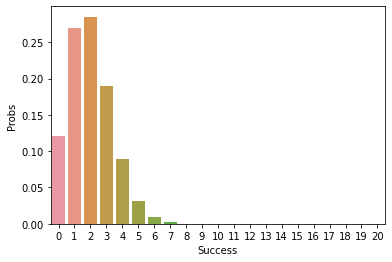

In [5]:
# To Visualise probability of all possibilities

import seaborn as sn
import pandas as pd

pbs = pd.DataFrame({
    'Success':range(0,21),
    'Probs': list(stats.binom.pmf(range(0,21), 20, 0.1))})

sn.barplot(x=pbs.Success, y=pbs.Probs)

In [7]:
#2. Probability that a maximum of 5 customers will return.
# strat 1: we can sum up all occurences i.e. range(0,6)

stats.binom.pmf(range(0,6), 20, 0.1).sum()

0.9887468658354902

In [8]:
# strat 2 is to use cumulative distribution function

stats.binom.cdf(5, 20, 0.1)

0.988746865835491

In [9]:
#3. Probability that more than 5 customers will return the items

1 - stats.binom.cdf(5, 20, 0.1)

0.011253134164509015

In [11]:
#4. Average Number of customers who will return their items
# Basically probability * Number of occurences, 0.1*20 = 2

#Functionally

mean, var = stats.binom.stats(20, 0.1)
print(mean)


2.0


### 2. Poisson Distribution

Lets say a call center recieves 10 calls per hour.
1. Calculate probability number of calls will ber maximum 5.
2. Calculate probability that calls will eexceed over 30 in 3 hours

In [13]:
# 1 - Simple cdf of poisson distribution

stats.poisson.cdf(5, 10)

0.06708596287903189

In [18]:
# 2 - cdf above 30 
1-stats.poisson.cdf(30, 30)

0.45164848742208863

<AxesSubplot:xlabel='Events', ylabel='Probability'>

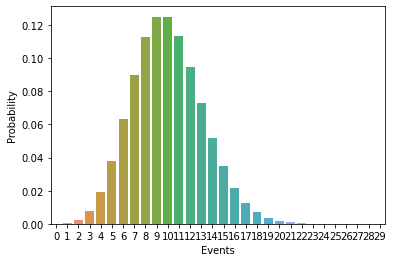

In [20]:
#Visualisation of the Distribution

psn = pd.DataFrame({
    'Events': range(0,30),
    'Probability': list(stats.poisson.pmf(range(0,30), 10))
})

sn.barplot(x=psn.Events, y=psn.Probability)

### 3. Exponential Distribution

Consider Mean time between failure of an avionic system as 1000 hours, calculate,

1. Probability of system failure before 1000 hours
2. probability it will not fail upto 2000 hours
3. Time by which 10% of system will fail (p10 Life)

In [21]:
# 1. simple cdf for 1k hours 

stats.expon.cdf(1000, 1/1000, 1000)

0.6321201909489326

In [23]:
# 2. same just for 2k hours

1-stats.expon.cdf(2000, 1/1000, 1000)

0.13533541857196352

In [24]:
# For this we have ppf function i.e. Percent point function, GIves output inthis case hours

stats.expon.ppf(0.1, 1/1000, 1000)

105.36151565782632

<AxesSubplot:xlabel='TimeToFailure', ylabel='pdf'>

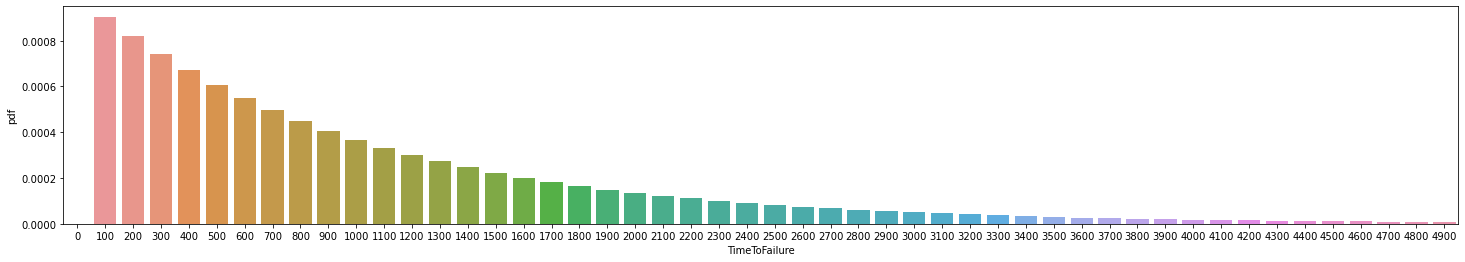

In [30]:
#Visualisation of Exponential Function

exp = pd.DataFrame({
    'TimeToFailure': range(0, 5000, 100),
    'pdf' : stats.expon.pdf(range(0, 5000, 100), 1/1000, 1000)
})

import matplotlib.pyplot as plt
plt.figure(figsize=(25,4))
sn.barplot(x=exp.TimeToFailure, y=exp.pdf)